In [27]:
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from tqdm import tqdm
import numpy as np
import pandas as pd
from torchvision.transforms import v2, ToTensor
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
device = 'cuda'

butterfly
347 640


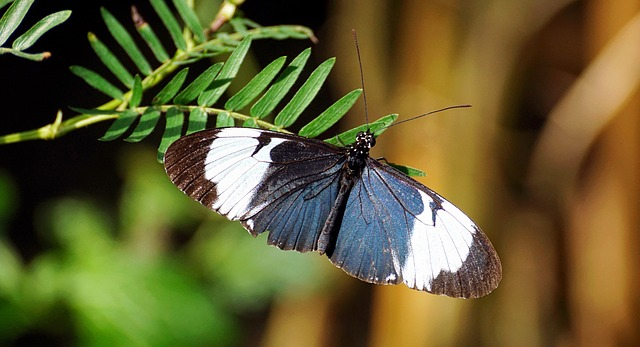

In [43]:
import random
# Setting up the path for data
data_path = Path(r'C:\\Users\\coys7\\Desktop\\python\\pytorch\\animals_class\\data\\raw-img')
image_path_list = list(data_path.glob('*/*.jpg'))
random_image_path = random.choice(image_path_list)

# Image show
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)
print(image_class)
print (img.height, img.width)
img

(-0.5, 425.5, 639.5, -0.5)

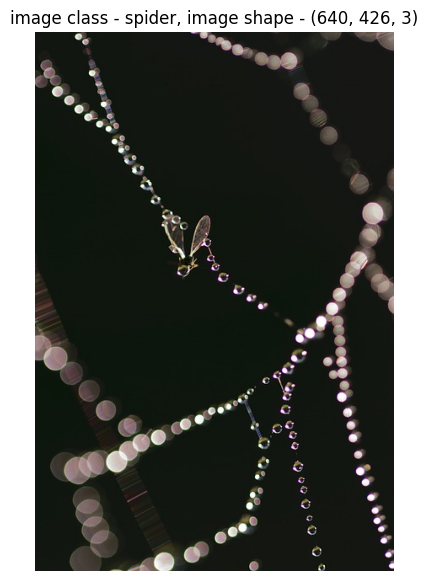

In [ ]:
# Transforming img to array

img_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.subplot(1,1,1)
plt.imshow(img_as_array)
plt.title(f'image class - {image_class}, image shape - {img_as_array.shape}')
plt.axis('off')

In [4]:
# augmentation for increasing number of images


# import os
# from PIL import Image
# import torchvision.transforms as transforms

# #  Set your directories
# input_dir = r'C:\Users\coys7\Desktop\python\pytorch\animals_class\data\raw-img'
# output_dir = r"C:\Users\coys7\Desktop\python\pytorch\animals_class\data\raw-img"
# os.makedirs(output_dir, exist_ok=True)

# #  Define augmentations
# augmentations = transforms.Compose([
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomRotation(degrees=20),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
#     transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
# ])

# #  How many augmentations per image
# n_augmentations = 5

# for root, dirs, files in os.walk(input_dir):
#     for file in files:
#         if not file.lower().endswith(('.jpg', '.jpeg', '.png')):
#             continue

#         file_path = os.path.join(root,file)
#         rel_path = os.path.relpath(root,input_dir)
#         output_subdir = os.path.join(output_dir, rel_path)
#         os.makedirs(output_subdir, exist_ok=True)

#         try:
#             image = Image.open(file_path).convert("RGB")
#         except Exception as e:
#             print(f"Skipping {file_path}: {e}")
#             continue

#         base_name, ext = os.path.splitext(file)
#         for i in range(n_augmentations):
#             aug_img = augmentations(image)
#             aug_name = f"{base_name}_aug{i+1}{ext}"
#             aug_path = os.path.join(output_subdir, aug_name)
#             aug_img.save(aug_path)


# print("Done augmenting and saving images.")


In [ ]:
# Preparing Datasets
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
transform = v2.Compose([v2.Resize((224,224)),
                        v2.ToTensor(),
                        v2.Normalize(mean=[0.485,0.456,0.406],
                                     std=[0.229,0.224,0.225])])
# transform_augmented = transforms.Compose([transforms.Resize((128,128)),
#                                  transforms.TrivialAugmentWide(num_magnitude_bins=31), 
#                                  transforms.ToTensor()])

Dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Classes
num_classes = len(Dataset.classes)
print(f'Number of classes {num_classes}')
num_samples=len(Dataset)
print (f'Number of samples {num_samples}')
class_names = Dataset.classes
print (class_names)

Number of classes 10
Number of samples 26179
['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


c:\Users\coys7\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [ ]:
# Function to display images

def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: list[str]=None,
                          n:int=10,
                          display_shape: bool=True,
                          seed: int=None):
    if n>10:
        n=10
        display_shape=False
    if seed:
        random.seed(seed)

    random_samples_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=((16,8)))
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        targ_image_adjust = targ_image.permute(1,2,0)

        plt.subplot(1,n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis('off')
        if classes:
            title = f'class {classes[targ_label]}'
            if display_shape:
                title = title + f'\nshape {targ_image_adjust.shape}'
        plt.title(title)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


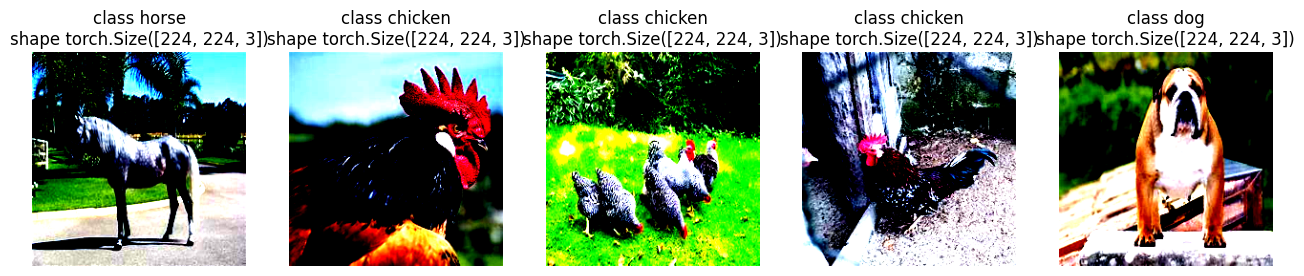

In [7]:
display_random_images(dataset=Dataset,
                      n=5,
                      classes=Dataset.classes,
                      seed=None)

In [ ]:
# Train_test split

train_size = int(0.8 * len(Dataset))
test_size = len(Dataset) - train_size
train_dataset, test_dataset =random_split(Dataset,[train_size, test_size])
batch_size = 32
train_dataloader = DataLoader(train_dataset, 
                              batch_size=batch_size, 
                              shuffle=True)
test_dataloader = DataLoader(test_dataset,
                             batch_size=batch_size,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x14fb1293c40>,
 <torch.utils.data.dataloader.DataLoader at 0x14fb1293fd0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


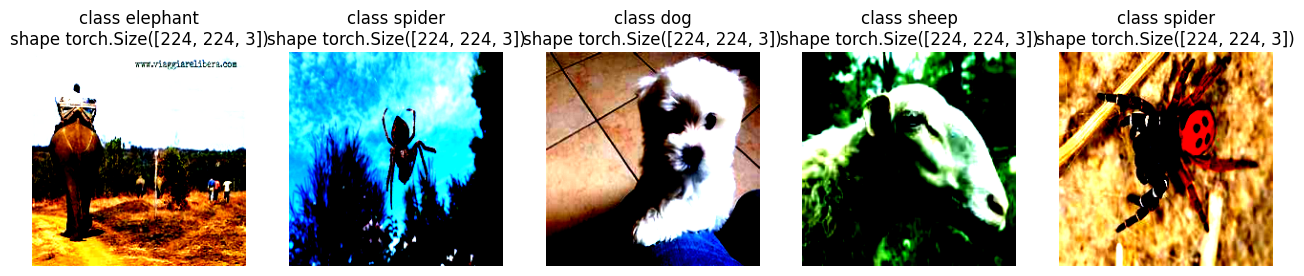

In [ ]:
display_random_images(dataset=train_dataset,
                      n=5,
                      classes=Dataset.classes,
                      seed=None)

In [ ]:
# Defining 1 model

class TinyVGG(nn.Module):
    def __init__ (self, input_shape: int, hidden_units:int, output_shape:int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                       out_channels = hidden_units,
                       kernel_size =3,
                       stride=1,
                       padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units,hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*56*56,
                      out_features=output_shape)
        )
    
    def forward(self,x :torch.Tensor):
        x=self.conv_block_1(x)
        x=self.conv_block_2(x)
        x=self.classifier(x)
        return x
    
model_0 = TinyVGG(input_shape=3, hidden_units=32, output_shape=len(Dataset.classes)).to(device)

In [ ]:
# Function for Train step
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
# Function for test step
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
# Combining train and test steps

from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

c:\Users\coys7\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" Using device: {device}")

 Using device: cuda


In [ ]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, 
                  hidden_units=10, 
                  output_shape=len(Dataset.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {(end_time-start_time)/60:.3f} minutes")

 20%|██        | 1/5 [01:09<04:37, 69.34s/it]

Epoch: 1 | train_loss: 1.7900 | train_acc: 0.3760 | test_loss: 1.6061 | test_acc: 0.4573


 40%|████      | 2/5 [02:09<03:11, 63.72s/it]

Epoch: 2 | train_loss: 1.3533 | train_acc: 0.5412 | test_loss: 1.4128 | test_acc: 0.5244


 60%|██████    | 3/5 [03:08<02:03, 61.86s/it]

Epoch: 3 | train_loss: 1.0473 | train_acc: 0.6444 | test_loss: 1.4424 | test_acc: 0.5341


 80%|████████  | 4/5 [04:09<01:01, 61.23s/it]

Epoch: 4 | train_loss: 0.7001 | train_acc: 0.7654 | test_loss: 1.6877 | test_acc: 0.5113


100%|██████████| 5/5 [05:08<00:00, 61.70s/it]

Epoch: 5 | train_loss: 0.3961 | train_acc: 0.8704 | test_loss: 2.1104 | test_acc: 0.5027
Total training time: 5.141 minutes


In [ ]:
# Using weights for pretrained model
from torchinfo import summary

weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
model_1 = torchvision.models.efficientnet_b0(weights=weights).to(device)
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [17]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [ ]:
# Creating Dataloaders for pretrained model
Dataset_EffNet = datasets.ImageFolder(root=data_path, transform=auto_transforms)
train_size = int(0.8 * len(Dataset_EffNet))
test_size = len(Dataset_EffNet) - train_size
train_dataset_EffNet, test_dataset_EffNet =random_split(Dataset_EffNet,[train_size, test_size])
batch_size = 32

train_dataloader_EffNet = DataLoader(train_dataset_EffNet, 
                              batch_size=batch_size, 
                              shuffle=True)
test_dataloader_EffNet = DataLoader(test_dataset_EffNet,
                             batch_size=batch_size,
                             shuffle=False)

train_dataset_EffNet, test_dataloader_EffNet, class_names

(<torch.utils.data.dataset.Subset at 0x1500840b100>,
 ['butterfly',
  'cat',
  'chicken',
  'cow',
  'dog',
  'elephant',
  'horse',
  'sheep',
  'spider',
  'squirrel'])

In [19]:
summary(model=model_1,
        input_size=(32,3,224,224),
        col_names=["input_size", "output_size", "num_params", 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [ ]:
# Saving params
for param in model_1.features.parameters():
    param.requires_grad=False

In [ ]:
# Changing number of classes in model from 1000 to 10 

torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape = len(class_names)

model_1.classifier = torch.nn.Sequential(torch.nn.Dropout(p=0.2, inplace=True),
                                         torch.nn.Linear(in_features=1280,
                                                         out_features=output_shape,
                                                         bias=True)).to(device)

In [22]:
summary(model=model_1,
        input_size=(32,3,224,224),
        col_names=["input_size", "output_size", "num_params", 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 10]             --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS=5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_EffNet,
                        test_dataloader=test_dataloader_EffNet,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {(end_time-start_time)/60:.3f} minutes")

 20%|██        | 1/5 [01:36<06:25, 96.50s/it]

Epoch: 1 | train_loss: 0.4237 | train_acc: 0.8987 | test_loss: 0.1905 | test_acc: 0.9514


 40%|████      | 2/5 [03:12<04:48, 96.24s/it]

Epoch: 2 | train_loss: 0.2279 | train_acc: 0.9307 | test_loss: 0.1534 | test_acc: 0.9552


 60%|██████    | 3/5 [04:48<03:12, 96.28s/it]

Epoch: 3 | train_loss: 0.2018 | train_acc: 0.9381 | test_loss: 0.1405 | test_acc: 0.9583


 80%|████████  | 4/5 [06:25<01:36, 96.44s/it]

Epoch: 4 | train_loss: 0.1965 | train_acc: 0.9394 | test_loss: 0.1401 | test_acc: 0.9581


100%|██████████| 5/5 [08:01<00:00, 96.37s/it]

Epoch: 5 | train_loss: 0.1799 | train_acc: 0.9437 | test_loss: 0.1316 | test_acc: 0.9613
Total training time: 8.031 minutes


In [61]:
data_path, random_image_path
img = Image.open(random_image_path)
img.show()

In [87]:
from typing import List, Tuple
from PIL import Image

def pred_and_plot_image (model:torch.nn.Module,
                         image_path: str,
                         class_names: List[str],
                         image_size: Tuple[int,int] = (224,224),
                         transform:torchvision.transforms = None,
                         device:torch.device=device):
    img = Image.open(image_path)

    # Img Transform
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485,0.456,0.406],
                                 std=[0.229,0.224,0.225])
        ])
    
    # Image Prediction
    model.to(device)
    model.eval()

    with torch.inference_mode():
        transformed_image = image_transform(img).unsqueeze(dim=0)
        target_image_pred = model(transformed_image.to(device))
    
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    target_image_pred_label = torch.argmax(target_image_pred,dim=1)

    plt.figure()
    plt.imshow(img)
    plt.title(f'Pred:{class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}')
    plt.axis(False)

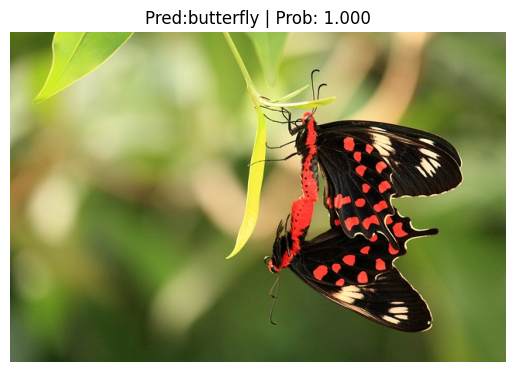

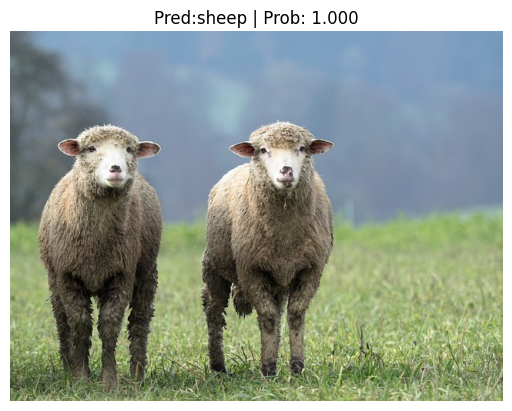

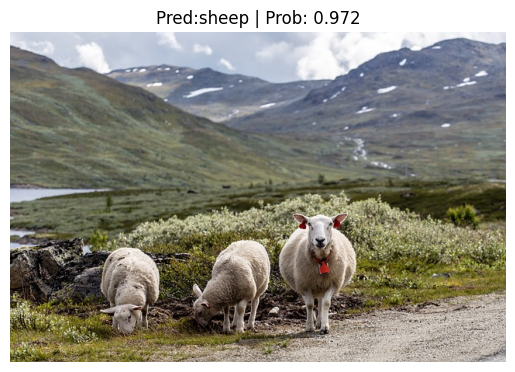

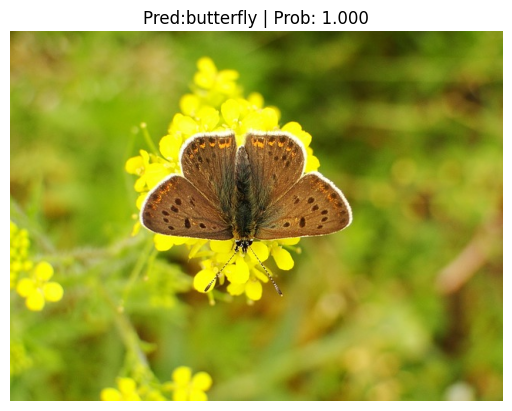

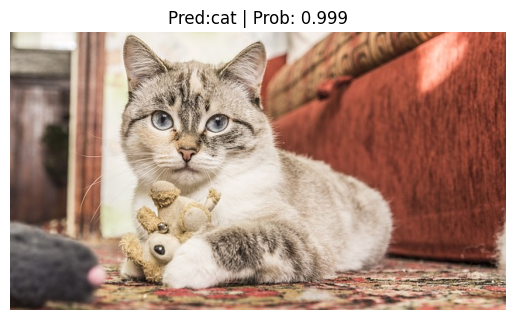

In [90]:
num_images_to_plot = 5
test_image_path_list = list(Path(data_path).glob("*/*.jpg"))
test_image_path_sample = random.sample(population=test_image_path_list,
                                       k=num_images_to_plot)



for image_path in test_image_path_sample:
    pred_and_plot_image(model=model_1,
                        image_path=image_path,
                        class_names=class_names,
                        image_size=(224,224))



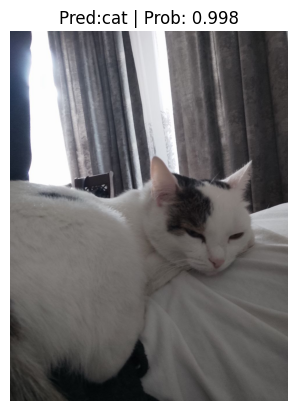

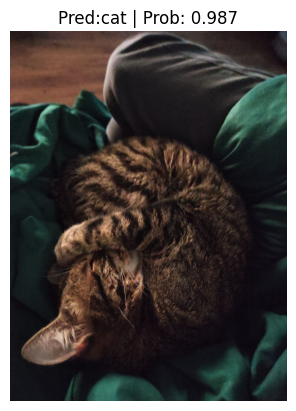

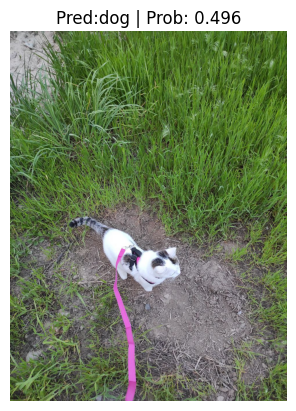

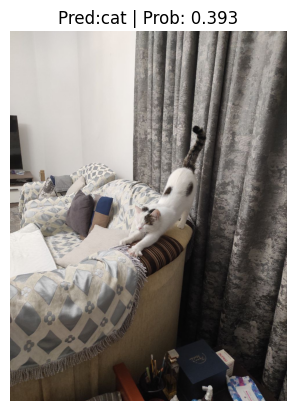

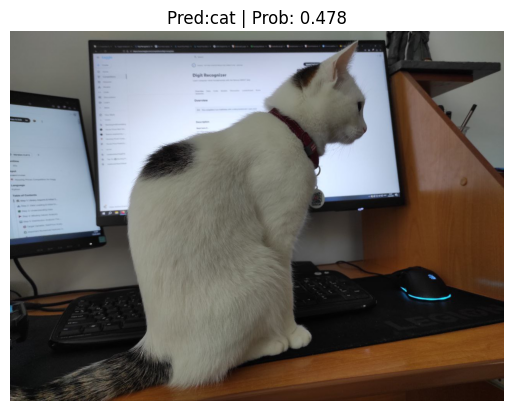

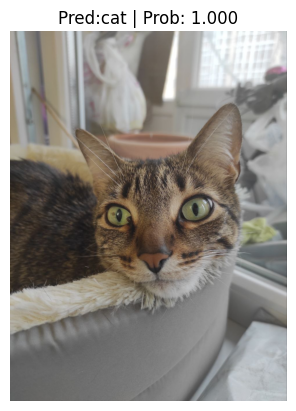

In [93]:
import requests

custom_image_path = Path(r"C:\Users\coys7\Desktop\python\pytorch\animals_class\data\custom_image")
num_images_to_plot = 6
custom_image_path_list = list(Path(custom_image_path).glob("*.jpg"))
custom_image_path_sample = random.sample(population=custom_image_path_list,
                                       k=num_images_to_plot)

for image_path in custom_image_path_sample:
    pred_and_plot_image(model=model_1,
                        image_path=image_path,
                        class_names=class_names,
                        image_size=(224,224))